In this approach, the percentage of each unique amino acid, in the different percentiles of the sequences (25%, 50%, etc.) is being considered.

We are training one model on the UniProt protein database, and the other on the proteins translated from the first chromosome.

In [1]:
import numpy as np
import pandas as pd

Training the model on the uniprot database:

In [2]:
import cudf

uniprot = cudf.read_csv('/kaggle/input/uniprot-proteins-reviewed-swissprot/data.csv')

In [3]:
uniprot = uniprot[['Sequence', 'Length', 'Organism']]
uniprot = uniprot[(uniprot['Organism'] == 'Homo sapiens (Human)') & (uniprot['Length'] > 20)]
uniprot = uniprot.head(2000)

In [4]:
uniprot

,Sequence,Length,Organism
28,MGLEALVPLAMIVAIFLLLVDLMHRHQRWAARYPPGPLPLPGLGNL...,515,Homo sapiens (Human)
53,MFRRLTFAQLLFATVLGIAGGVYIFQPVFEQYAKDQKELKEKMQLV...,54,Homo sapiens (Human)
54,MVIMSEFSADPAGQGQGQQKPLRVGFYDIERTLGKGNFAVVKLARH...,783,Homo sapiens (Human)
139,MTQRAGAAMLPSALLLLCVPGCLTVSGPSTVMGAVGESLSVQCRYE...,201,Homo sapiens (Human)
181,MGDQPCASGRSTLPPGNAREAKPPKKRCLLAPRWDYPEGTPNGGST...,68,Homo sapiens (Human)
...,...,...,...
9230,MPQLNTTVWPTMITPMLLTLFLITQLKMLNTNYHLPPSPKPMKMKN...,68,Homo sapiens (Human)
9234,MVMGLGVLLLVFVLGLGLTPPTLAQDNSRYTHFLTQHYDAKPQGRD...,147,Homo sapiens (Human)
9235,MIFLYQVVHFILFTSVSGECVTQLLKDTCFEGGDITTVFTPSAKYC...,625,Homo sapiens (Human)
9236,MILFKQATYFISLFATVSCGCLTQLYENAFFRGGDVASMYTPNAQY...,638,Homo sapiens (Human)


In [5]:
import cudf
import pandas as pd

percentages = [0.25, 0.5, 0.75, 1.0]

#Get the unique amino acids
amino_acids = sorted(set(''.join(uniprot['Sequence'].to_arrow().to_pylist())))

#Iterate over each unique amino acid
for amino_acid in amino_acids:
    #Calculate the frequency of the amino acid for each percentage of each sequence
    for percentage in percentages:
        uniprot[f'{amino_acid}_{int(percentage*100)}%'] = uniprot['Sequence'].to_pandas().apply(
            lambda sequence: sequence.count(amino_acid) / len(sequence[:int(len(sequence) * percentage)])
        )

In [6]:
uniprot

,Sequence,Length,Organism,A_25%,A_50%,A_75%,A_100%,C_25%,C_50%,C_75%,...,V_75%,V_100%,W_25%,W_50%,W_75%,W_100%,Y_25%,Y_50%,Y_75%,Y_100%
28,MGLEALVPLAMIVAIFLLLVDLMHRHQRWAARYPPGPLPLPGLGNL...,515,Homo sapiens (Human),0.328125,0.163424,0.108808,0.081553,0.070312,0.035019,0.023316,...,0.113990,0.085437,0.054688,0.027237,0.018135,0.013592,0.046875,0.023346,0.015544,0.011650
53,MFRRLTFAQLLFATVLGIAGGVYIFQPVFEQYAKDQKELKEKMQLV...,54,Homo sapiens (Human),0.307692,0.148148,0.100000,0.074074,0.000000,0.000000,0.000000,...,0.100000,0.074074,0.000000,0.000000,0.000000,0.000000,0.153846,0.074074,0.050000,0.037037
54,MVIMSEFSADPAGQGQGQQKPLRVGFYDIERTLGKGNFAVVKLARH...,783,Homo sapiens (Human),0.338462,0.168798,0.112436,0.084291,0.097436,0.048593,0.032368,...,0.071550,0.053640,0.030769,0.015345,0.010221,0.007663,0.082051,0.040921,0.027257,0.020434
139,MTQRAGAAMLPSALLLLCVPGCLTVSGPSTVMGAVGESLSVQCRYE...,201,Homo sapiens (Human),0.220000,0.110000,0.073333,0.054726,0.160000,0.080000,0.053333,...,0.106667,0.079602,0.100000,0.050000,0.033333,0.024876,0.080000,0.040000,0.026667,0.019900
181,MGDQPCASGRSTLPPGNAREAKPPKKRCLLAPRWDYPEGTPNGGST...,68,Homo sapiens (Human),0.411765,0.205882,0.137255,0.102941,0.117647,0.058824,0.039216,...,0.000000,0.000000,0.058824,0.029412,0.019608,0.014706,0.058824,0.029412,0.019608,0.014706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9230,MPQLNTTVWPTMITPMLLTLFLITQLKMLNTNYHLPPSPKPMKMKN...,68,Homo sapiens (Human),0.000000,0.000000,0.000000,0.000000,0.058824,0.029412,0.019608,...,0.019608,0.014706,0.176471,0.088235,0.058824,0.044118,0.117647,0.058824,0.039216,0.029412
9234,MVMGLGVLLLVFVLGLGLTPPTLAQDNSRYTHFLTQHYDAKPQGRD...,147,Homo sapiens (Human),0.166667,0.082192,0.054545,0.040816,0.166667,0.082192,0.054545,...,0.081818,0.061224,0.027778,0.013699,0.009091,0.006803,0.111111,0.054795,0.036364,0.027211
9235,MIFLYQVVHFILFTSVSGECVTQLLKDTCFEGGDITTVFTPSAKYC...,625,Homo sapiens (Human),0.192308,0.096154,0.064103,0.048000,0.230769,0.115385,0.076923,...,0.081197,0.060800,0.064103,0.032051,0.021368,0.016000,0.141026,0.070513,0.047009,0.035200
9236,MILFKQATYFISLFATVSCGCLTQLYENAFFRGGDVASMYTPNAQY...,638,Homo sapiens (Human),0.169811,0.084639,0.056485,0.042320,0.232704,0.115987,0.077406,...,0.079498,0.059561,0.069182,0.034483,0.023013,0.017241,0.150943,0.075235,0.050209,0.037618


Training the first model, solely on the uniprot protein sequences:

In [7]:
import cudf
import cuml
import cupy as cp

num_clusters = 100

#A temporary fix, since 'U' amino acid is not in any sequence in our selected proteins from the genome
uniprot = uniprot.drop(['U_25%', 'U_50%', 'U_75%', 'U_100%'], axis=1)
#Create a new DataFrame with the amino acid columns
uniprot_train = uniprot[uniprot.columns[3:84]]

#Convert the training data to a cuPy array
uniprot_train_data = cp.asarray(uniprot_train.values)

model = cuml.KMeans(n_clusters=num_clusters, random_state=42, n_init=100)
model.fit(uniprot_train_data)

KMeans()

In [8]:
labels = model.predict(uniprot_train_data)
uniprot['Cluster'] = labels

In [9]:
uniprot['Cluster'].value_counts()

27    70
20    58
74    56
4     55
56    52
      ..
60     1
58     1
63     1
57     1
19     1
Name: Cluster, Length: 100, dtype: int32

In [10]:
filtered_uniprot = uniprot[uniprot['Cluster'] == 53]
filtered_uniprot.head()

,Sequence,Length,Organism,A_25%,A_50%,A_75%,A_100%,C_25%,C_50%,C_75%,...,V_100%,W_25%,W_50%,W_75%,W_100%,Y_25%,Y_50%,Y_75%,Y_100%,Cluster
3747,MGNGMCSRKQKRIFQTLLLLTVVFGFLYGAMLYYELQTQLRKAEAV...,696,Homo sapiens (Human),0.304598,0.152299,0.101533,0.076149,0.005747,0.002874,0.001916,...,0.048851,0.011494,0.005747,0.003831,0.002874,0.109195,0.054598,0.036398,0.027299,53
4615,MAELIQKKLQGEVEKYQQLQKDLSKSMSGRQKLEAQLTENNIVKEE...,129,Homo sapiens (Human),0.406250,0.203125,0.135417,0.100775,0.000000,0.000000,0.000000,...,0.054264,0.000000,0.000000,0.000000,0.000000,0.093750,0.046875,0.031250,0.023256,53
5704,MTQQGAALQNYNNELVKCIEELCQKREELCRQIQEEEDEKQRLQNE...,119,Homo sapiens (Human),0.379310,0.186441,0.123596,0.092437,0.103448,0.050847,0.033708,...,0.033613,0.000000,0.000000,0.000000,0.000000,0.068966,0.033898,0.022472,0.016807,53
6301,MNSLFRKRNKGKYSPTVQTRSISNKELSELIEQLQKNADQVEKNIV...,1756,Homo sapiens (Human),0.296128,0.148064,0.098709,0.074032,0.022779,0.011390,0.007593,...,0.063212,0.027335,0.013667,0.009112,0.006834,0.082005,0.041002,0.027335,0.020501,53
6950,MASQSQGIQQLLQAEKRAAEKVSEARKRKNRRLKQAKEEAQAEIEQ...,118,Homo sapiens (Human),0.448276,0.220339,0.147727,0.110169,0.068966,0.033898,0.022727,...,0.033898,0.000000,0.000000,0.000000,0.000000,0.103448,0.050847,0.034091,0.025424,53


Plotting a 2-dimensional PCA graph:

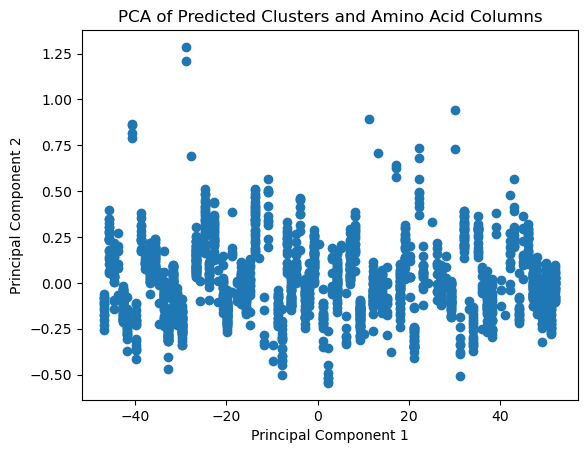

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Extract the columns for PCA
vectors_cols = ['Cluster'] + list(uniprot.columns[3:84])
vectors = uniprot[vectors_cols]

# Convert the DataFrame to a NumPy array
vectors = vectors.to_pandas().values

# Perform PCA
pca = PCA(n_components=2)
vectors = pca.fit_transform(vectors)

# Plot the results
plt.scatter(vectors[:, 0], vectors[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Predicted Clusters and Amino Acid Columns')
plt.show()

Plotting a 3-dimensional PCA graph:

In [12]:
import numpy as np
import plotly.graph_objs as go
from sklearn.decomposition import PCA

#Extract the columns for PCA
vectors_cols = ['Cluster'] + list(uniprot.columns[3:84])
vectors = uniprot[vectors_cols]

#Convert the DataFrame to a NumPy array
vectors = vectors.to_pandas().values

cluster_labels = uniprot['Cluster'].to_pandas()

num_clusters = 100

# Perform PCA on the word vectors
pca = PCA(n_components=3)
vectors_pca = pca.fit_transform(vectors)

# Create a 3D scatter plot
trace = go.Scatter3d(
    x=vectors_pca[:, 0],
    y=vectors_pca[:, 1],
    z=vectors_pca[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=cluster_labels,
        colorscale='Viridis',
        opacity=0.8
    )
)

# Create the layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Principal Component 1'),
        yaxis=dict(title='Principal Component 2'),
        zaxis=dict(title='Principal Component 3')
    ),
    title='Amino Acid Sequence Vectors - PCA'
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

fig.show()

Saving the model:

In [13]:
from sklearn.cluster import KMeans
import joblib

joblib.dump(model, '/kaggle/working/checkpoint2_model_uniprot.pkl')

['/kaggle/working/checkpoint2_model_uniprot.pkl']

Uncomment to load the model:

In [14]:
#import joblib

#model = joblib.load('/kaggle/working/checkpoint2_model.pkl')

Reading the genome:

In [15]:
from Bio import SeqIO
genome = SeqIO.read('/kaggle/input/grch38-human-genome-dna/Homo_sapiens.GRCh38.dna.chromosome.1.fa','fasta')

In [16]:
print('Length of the sequence: ',len(genome))

Length of the sequence:  248956422


In [17]:
genome_DNA = genome.seq

In [18]:
genome_pro = genome_DNA.translate()
print('DNA: ',genome_DNA[:100])
print('Proteins: ',genome_pro[:100])

DNA:  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
Proteins:  XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [19]:
functional_pro = str(genome_pro).split('*')

functional_pro = [i for i in functional_pro if len(i)>=20 if 'X' not in str(i)]

print('Number of Functional Proteins: ',len(functional_pro))

Number of Functional Proteins:  1290444


Creating a dataframe with 1% of proteins:

In [20]:
import cudf

# Create a cuDF DataFrame to be the main DataFrame
df = cudf.DataFrame()
df['sequence no'] = range(len(functional_pro)//100)
df['amino acid sequence'] = cudf.Series([str(seq) for seq in functional_pro[:len(functional_pro)//100]])
df['sequence length'] = df['amino acid sequence'].str.len()


df

,sequence no,amino acid sequence,sequence length
0,0,PSRYPQPARPPGSDLRRTVLRLQSTTEICAEDNAAPPSRCSPGLC,45
1,1,GERNSAVAKARRAGAGAERRAAPAQAQRGAPRRRRRREARRAGAGA...,222
2,2,SGGQRPLLAPGHCRALLLTV,20
3,3,WWHAACWQLGTLQGPLAQGVVAARPPAGSWGHCRALLLQQYWRIIG...,74
4,4,LPSELYCSVSHQQCLGMPVSPQSVYFWIFASLTGEALEILISDLGW...,57
...,...,...,...
12899,12899,ASDRMEWHPHLQVSIRQPGT,20
12900,12900,QPGTASTPPGEHLTAWNGILTSR,23
12901,12901,ASDSLEQNSPTTGEDLTAWNRTPLFQVRI,29
12902,12902,HIKQHPATPGEHLTVWNSIHTPRRASDSLE,30


Finding the Amino Acid Composition (AAC):

In [21]:
import cudf
import pandas as pd

percentages = [0.25, 0.5, 0.75, 1.0]

#Get the unique amino acids
amino_acids = sorted(set(''.join(df['amino acid sequence'].to_arrow().to_pylist())))

#Iterate over each unique amino acid
for amino_acid in amino_acids:
    #Calculate the frequency of the amino acid for each percentage of each sequence
    for percentage in percentages:
        df[f'{amino_acid}_{int(percentage*100)}%'] = df['amino acid sequence'].to_pandas().apply(
            lambda sequence: sequence.count(amino_acid) / len(sequence[:int(len(sequence) * percentage)])
        )


In [22]:
df

,sequence no,amino acid sequence,sequence length,A_25%,A_50%,A_75%,A_100%,C_25%,C_50%,C_75%,...,V_75%,V_100%,W_25%,W_50%,W_75%,W_100%,Y_25%,Y_50%,Y_75%,Y_100%
0,0,PSRYPQPARPPGSDLRRTVLRLQSTTEICAEDNAAPPSRCSPGLC,45,0.363636,0.181818,0.121212,0.088889,0.272727,0.136364,0.090909,...,0.030303,0.022222,0.000000,0.000000,0.000000,0.000000,0.090909,0.045455,0.030303,0.022222
1,1,GERNSAVAKARRAGAGAERRAAPAQAQRGAPRRRRRREARRAGAGA...,222,0.818182,0.405405,0.271084,0.202703,0.072727,0.036036,0.024096,...,0.054217,0.040541,0.072727,0.036036,0.024096,0.018018,0.036364,0.018018,0.012048,0.009009
2,2,SGGQRPLLAPGHCRALLLTV,20,0.400000,0.200000,0.133333,0.100000,0.200000,0.100000,0.066667,...,0.066667,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,WWHAACWQLGTLQGPLAQGVVAARPPAGSWGHCRALLLQQYWRIIG...,74,0.388889,0.189189,0.127273,0.094595,0.111111,0.054054,0.036364,...,0.072727,0.054054,0.277778,0.135135,0.090909,0.067568,0.111111,0.054054,0.036364,0.027027
4,4,LPSELYCSVSHQQCLGMPVSPQSVYFWIFASLTGEALEILISDLGW...,57,0.214286,0.107143,0.071429,0.052632,0.214286,0.107143,0.071429,...,0.071429,0.052632,0.142857,0.071429,0.047619,0.035088,0.142857,0.071429,0.047619,0.035088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12899,12899,ASDRMEWHPHLQVSIRQPGT,20,0.200000,0.100000,0.066667,0.050000,0.000000,0.000000,0.000000,...,0.066667,0.050000,0.200000,0.100000,0.066667,0.050000,0.000000,0.000000,0.000000,0.000000
12900,12900,QPGTASTPPGEHLTAWNGILTSR,23,0.400000,0.181818,0.117647,0.086957,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,0.090909,0.058824,0.043478,0.000000,0.000000,0.000000,0.000000
12901,12901,ASDSLEQNSPTTGEDLTAWNRTPLFQVRI,29,0.285714,0.142857,0.095238,0.068966,0.000000,0.000000,0.000000,...,0.047619,0.034483,0.142857,0.071429,0.047619,0.034483,0.000000,0.000000,0.000000,0.000000
12902,12902,HIKQHPATPGEHLTVWNSIHTPRRASDSLE,30,0.285714,0.133333,0.090909,0.066667,0.000000,0.000000,0.000000,...,0.045455,0.033333,0.142857,0.066667,0.045455,0.033333,0.000000,0.000000,0.000000,0.000000


Training the second model, solely on the proteins from the human genome:

In [23]:
import cudf
import cuml
import cupy as cp

num_clusters = 100

#Create a new DataFrame with the amino acid columns
df_train = df[df.columns[3:84]]

#Convert the training data to a cuPy array
train_data = cp.asarray(df_train.values)

model_genome= cuml.KMeans(n_clusters=num_clusters, random_state=42, n_init=100)
model_genome.fit(train_data)

KMeans()

Saving the second model:

In [24]:
from sklearn.cluster import KMeans
import joblib

joblib.dump(model, '/kaggle/working/checkpoint2_model_genome.pkl')

['/kaggle/working/checkpoint2_model_genome.pkl']

In [25]:
labels = model_genome.predict(train_data)
df['Cluster'] = labels

In [26]:
df['Cluster'].value_counts()

81    339
99    316
69    273
85    267
17    239
     ... 
29     24
75     21
53     19
38     13
54      2
Name: Cluster, Length: 100, dtype: int32

In [27]:
df

,sequence no,amino acid sequence,sequence length,A_25%,A_50%,A_75%,A_100%,C_25%,C_50%,C_75%,...,V_100%,W_25%,W_50%,W_75%,W_100%,Y_25%,Y_50%,Y_75%,Y_100%,Cluster
0,0,PSRYPQPARPPGSDLRRTVLRLQSTTEICAEDNAAPPSRCSPGLC,45,0.363636,0.181818,0.121212,0.088889,0.272727,0.136364,0.090909,...,0.022222,0.000000,0.000000,0.000000,0.000000,0.090909,0.045455,0.030303,0.022222,1
1,1,GERNSAVAKARRAGAGAERRAAPAQAQRGAPRRRRRREARRAGAGA...,222,0.818182,0.405405,0.271084,0.202703,0.072727,0.036036,0.024096,...,0.040541,0.072727,0.036036,0.024096,0.018018,0.036364,0.018018,0.012048,0.009009,90
2,2,SGGQRPLLAPGHCRALLLTV,20,0.400000,0.200000,0.133333,0.100000,0.200000,0.100000,0.066667,...,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31
3,3,WWHAACWQLGTLQGPLAQGVVAARPPAGSWGHCRALLLQQYWRIIG...,74,0.388889,0.189189,0.127273,0.094595,0.111111,0.054054,0.036364,...,0.054054,0.277778,0.135135,0.090909,0.067568,0.111111,0.054054,0.036364,0.027027,92
4,4,LPSELYCSVSHQQCLGMPVSPQSVYFWIFASLTGEALEILISDLGW...,57,0.214286,0.107143,0.071429,0.052632,0.214286,0.107143,0.071429,...,0.052632,0.142857,0.071429,0.047619,0.035088,0.142857,0.071429,0.047619,0.035088,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12899,12899,ASDRMEWHPHLQVSIRQPGT,20,0.200000,0.100000,0.066667,0.050000,0.000000,0.000000,0.000000,...,0.050000,0.200000,0.100000,0.066667,0.050000,0.000000,0.000000,0.000000,0.000000,47
12900,12900,QPGTASTPPGEHLTAWNGILTSR,23,0.400000,0.181818,0.117647,0.086957,0.000000,0.000000,0.000000,...,0.000000,0.200000,0.090909,0.058824,0.043478,0.000000,0.000000,0.000000,0.000000,13
12901,12901,ASDSLEQNSPTTGEDLTAWNRTPLFQVRI,29,0.285714,0.142857,0.095238,0.068966,0.000000,0.000000,0.000000,...,0.034483,0.142857,0.071429,0.047619,0.034483,0.000000,0.000000,0.000000,0.000000,27
12902,12902,HIKQHPATPGEHLTVWNSIHTPRRASDSLE,30,0.285714,0.133333,0.090909,0.066667,0.000000,0.000000,0.000000,...,0.033333,0.142857,0.066667,0.045455,0.033333,0.000000,0.000000,0.000000,0.000000,7


In [28]:
filtered_df = df[df['Cluster']==0]

In [29]:
filtered_df.head()

,sequence no,amino acid sequence,sequence length,A_25%,A_50%,A_75%,A_100%,C_25%,C_50%,C_75%,...,V_100%,W_25%,W_50%,W_75%,W_100%,Y_25%,Y_50%,Y_75%,Y_100%,Cluster
426,426,LRVRQGRLEGSLQWNSGLRLLFFCSL,26,0.000000,0.000000,0.000000,0.000000,0.166667,0.076923,0.052632,...,0.038462,0.166667,0.076923,0.052632,0.038462,0.0,0.0,0.0,0.0,0
646,646,NGCWWWVQGRWELLHGSQRLD,21,0.000000,0.000000,0.000000,0.000000,0.200000,0.100000,0.066667,...,0.047619,0.800000,0.400000,0.266667,0.190476,0.0,0.0,0.0,0.0,0
647,647,GRCQLKLLGQHGQDVLHTNLGEEDVCIAGPLLLPLP,36,0.111111,0.055556,0.037037,0.027778,0.222222,0.111111,0.074074,...,0.055556,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0
686,686,SQLLGRLRWENHWNPDNQGCNEL,23,0.000000,0.000000,0.000000,0.000000,0.200000,0.090909,0.058824,...,0.000000,0.400000,0.181818,0.117647,0.086957,0.0,0.0,0.0,0.0,0
718,718,QDLGGTHLWSLLLGRMRWED,20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.400000,0.200000,0.133333,0.100000,0.0,0.0,0.0,0.0,0


A graph between the clusters and the PCA

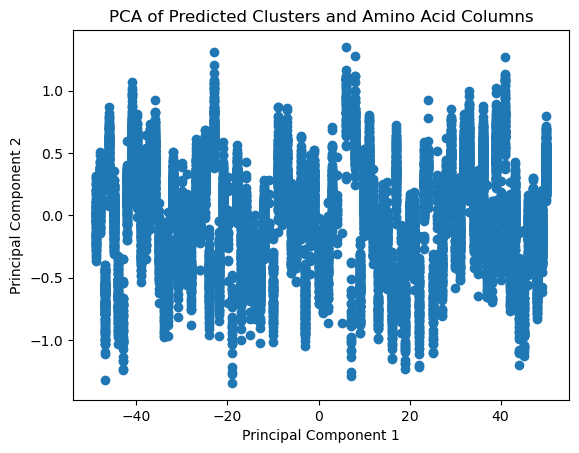

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Extract the columns for PCA
vectors_cols = ['Cluster'] + list(df.columns[3:84])
vectors = df[vectors_cols]

# Convert the DataFrame to a NumPy array
vectors = vectors.to_pandas().values

# Perform PCA
pca = PCA(n_components=2)
vectors = pca.fit_transform(vectors)

# Plot the results
plt.scatter(vectors[:, 0], vectors[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Predicted Clusters and Amino Acid Columns')
plt.show()

In [31]:
import numpy as np
import plotly.graph_objs as go
from sklearn.decomposition import PCA

#Extract the columns for PCA
vectors_cols = ['Cluster'] + list(df.columns[3:84])
vectors = df[vectors_cols]

#Convert the DataFrame to a NumPy array
vectors = vectors.to_pandas().values

cluster_labels = df['Cluster'].to_pandas()

num_clusters = 100

# Perform PCA on the word vectors
pca = PCA(n_components=3)
vectors_pca = pca.fit_transform(vectors)

# Create a 3D scatter plot
trace = go.Scatter3d(
    x=vectors_pca[:, 0],
    y=vectors_pca[:, 1],
    z=vectors_pca[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=cluster_labels,
        colorscale='Viridis',
        opacity=0.8
    )
)

# Create the layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Principal Component 1'),
        yaxis=dict(title='Principal Component 2'),
        zaxis=dict(title='Principal Component 3')
    ),
    title='Amino Acid Sequence Vectors - PCA'
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

fig.show()

Running both the models on the other 1% of proteins that were ignored:

In [32]:
import cudf

# Create a cuDF DataFrame for predicting clusters
df_predict = cudf.DataFrame()
df_predict['sequence no'] = range(len(functional_pro)//100)
df_predict['amino acid sequence'] = cudf.Series([str(seq) for seq in functional_pro[len(functional_pro)//100:2*len(functional_pro)//100]])
df_predict['sequence length'] = df_predict['amino acid sequence'].str.len()

df_predict

,sequence no,amino acid sequence,sequence length
0,0,QPGAAPTPPGEHLTAWGSAHSPR,23
1,1,ASDSPEQRPHPQVSIWQPGAAPTPPGEHLTAWSSAHTLR,39
2,2,ASDSLGQHPHPQVSIWQPGTASTAPGDHLTA,31
3,3,ACDHMECHPHLQVSIRQPGTEFSNPR,26
4,4,QHGTRPLLPGEHLTTWESTLHPHVSI,26
...,...,...,...
12899,12899,IHYLTRERALLSDLAAFTLP,20
12900,12900,ATSSETPGRWRRRLVPVHTPHQKPAFHSCSNECNPFSEDTAPASRKTQ,48
12901,12901,HGASILLFVSVHCSLAFAYLALAGKS,26
12902,12902,CICVIEVHMEGLVCRNLLLCWGQMVLLPIFHLSLSLGPREALSPTG...,67


In [33]:
import cudf
import pandas as pd

percentages = [0.25, 0.5, 0.75, 1.0]

#Get the unique amino acids
amino_acids = sorted(set(''.join(df_predict['amino acid sequence'].to_arrow().to_pylist())))

#Iterate over each unique amino acid
for amino_acid in amino_acids:
    #Calculate the frequency of the amino acid for each percentage of each sequence
    for percentage in percentages:
        df_predict[f'{amino_acid}_{int(percentage*100)}%'] = df_predict['amino acid sequence'].to_pandas().apply(
            lambda sequence: sequence.count(amino_acid) / len(sequence[:int(len(sequence) * percentage)])
        )

In [34]:
df_predict

,sequence no,amino acid sequence,sequence length,A_25%,A_50%,A_75%,A_100%,C_25%,C_50%,C_75%,...,V_75%,V_100%,W_25%,W_50%,W_75%,W_100%,Y_25%,Y_50%,Y_75%,Y_100%
0,0,QPGAAPTPPGEHLTAWGSAHSPR,23,0.800000,0.363636,0.235294,0.173913,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,0.090909,0.058824,0.043478,0.000000,0.000000,0.000000,0.000000
1,1,ASDSPEQRPHPQVSIWQPGAAPTPPGEHLTAWSSAHTLR,39,0.555556,0.263158,0.172414,0.128205,0.000000,0.000000,0.000000,...,0.034483,0.025641,0.222222,0.105263,0.068966,0.051282,0.000000,0.000000,0.000000,0.000000
2,2,ASDSLGQHPHPQVSIWQPGTASTAPGDHLTA,31,0.571429,0.266667,0.173913,0.129032,0.000000,0.000000,0.000000,...,0.043478,0.032258,0.142857,0.066667,0.043478,0.032258,0.000000,0.000000,0.000000,0.000000
3,3,ACDHMECHPHLQVSIRQPGTEFSNPR,26,0.166667,0.076923,0.052632,0.038462,0.333333,0.153846,0.105263,...,0.052632,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,QHGTRPLLPGEHLTTWESTLHPHVSI,26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.052632,0.038462,0.166667,0.076923,0.052632,0.038462,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12899,12899,IHYLTRERALLSDLAAFTLP,20,0.600000,0.300000,0.200000,0.150000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.100000,0.066667,0.050000
12900,12900,ATSSETPGRWRRRLVPVHTPHQKPAFHSCSNECNPFSEDTAPASRKTQ,48,0.333333,0.166667,0.111111,0.083333,0.166667,0.083333,0.055556,...,0.055556,0.041667,0.083333,0.041667,0.027778,0.020833,0.000000,0.000000,0.000000,0.000000
12901,12901,HGASILLFVSVHCSLAFAYLALAGKS,26,0.833333,0.384615,0.263158,0.192308,0.166667,0.076923,0.052632,...,0.105263,0.076923,0.000000,0.000000,0.000000,0.000000,0.166667,0.076923,0.052632,0.038462
12902,12902,CICVIEVHMEGLVCRNLLLCWGQMVLLPIFHLSLSLGPREALSPTG...,67,0.187500,0.090909,0.060000,0.044776,0.312500,0.151515,0.100000,...,0.100000,0.074627,0.062500,0.030303,0.020000,0.014925,0.000000,0.000000,0.000000,0.000000


Creating the test data:

In [35]:
#Create a new DataFrame with the amino acid columns
df_test = df_predict[df_predict.columns[3:84]]

#Convert the training data to a cuPy array
test_data = cp.asarray(df_test.values)

Testing on the first model, and plotting a 3-dimensional PCA graph:

In [36]:
labels_predict = model.predict(test_data)
df_predict['Cluster'] = labels_predict

In [37]:
df_predict['Cluster'].value_counts()

69    872
40    510
24    468
55    437
33    427
     ... 
57      8
34      6
27      5
18      4
58      3
Name: Cluster, Length: 100, dtype: int32

A graph between clusters and PCA:

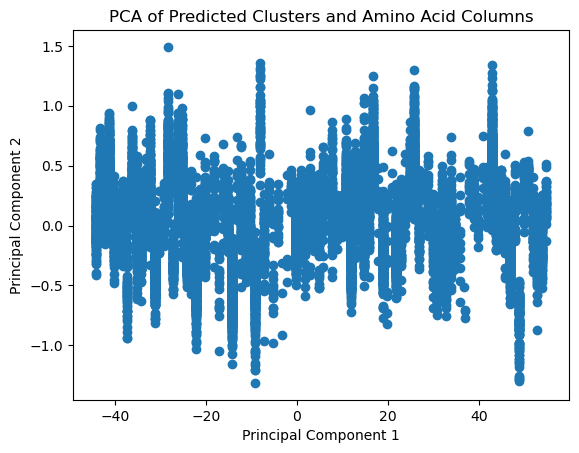

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Extract the columns for PCA
vectors_cols = ['Cluster'] + list(df_predict.columns[3:84])
vectors = df_predict[vectors_cols]

#Convert the DataFrame to a NumPy array
vectors = vectors.to_pandas().values

#Perform PCA
pca = PCA(n_components=2)
vectors = pca.fit_transform(vectors)

# Plot the results
plt.scatter(vectors[:, 0], vectors[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Predicted Clusters and Amino Acid Columns')
plt.show()

In [39]:
import numpy as np
import plotly.graph_objs as go
from sklearn.decomposition import PCA

#Extract the columns for PCA
vectors_cols = ['Cluster'] + list(df_predict.columns[3:84])
vectors = df_predict[vectors_cols]

#Convert the DataFrame to a NumPy array
vectors = vectors.to_pandas().values

cluster_labels = df_predict['Cluster'].to_pandas()

num_clusters = 100

#Perform PCA on the word vectors
pca = PCA(n_components=3)
vectors_pca = pca.fit_transform(vectors)

#Create a 3D scatter plot
trace = go.Scatter3d(
    x=vectors_pca[:, 0],
    y=vectors_pca[:, 1],
    z=vectors_pca[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=cluster_labels,
        colorscale='Viridis',
        opacity=0.8
    )
)

# Create the layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Principal Component 1'),
        yaxis=dict(title='Principal Component 2'),
        zaxis=dict(title='Principal Component 3')
    ),
    title='Amino Acid Sequence Vectors - PCA'
)

#Create the figure
fig = go.Figure(data=[trace], layout=layout)

fig.show()

Testing on the 2nd Model:

In [40]:
df_predict2 = df_predict.copy()

labels_predict = model_genome.predict(test_data)
df_predict2['Cluster'] = labels_predict

In [41]:
df_predict2['Cluster'].value_counts()

69    497
99    349
31    289
81    269
28    268
     ... 
7      24
6      21
53     17
38     10
54      5
Name: Cluster, Length: 100, dtype: int32

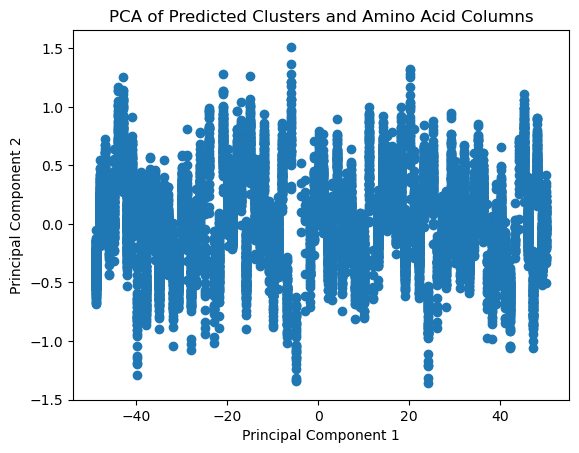

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Extract the columns for PCA
vectors_cols = ['Cluster'] + list(df_predict2.columns[3:84])
vectors = df_predict2[vectors_cols]

#Convert the DataFrame to a NumPy array
vectors = vectors.to_pandas().values

#Perform PCA
pca = PCA(n_components=2)
vectors = pca.fit_transform(vectors)

# Plot the results
plt.scatter(vectors[:, 0], vectors[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Predicted Clusters and Amino Acid Columns')
plt.show()

In [43]:
import numpy as np
import plotly.graph_objs as go
from sklearn.decomposition import PCA

#Extract the columns for PCA
vectors_cols = ['Cluster'] + list(df_predict2.columns[3:84])
vectors = df_predict2[vectors_cols]

#Convert the DataFrame to a NumPy array
vectors = vectors.to_pandas().values

cluster_labels = df_predict2['Cluster'].to_pandas()

num_clusters = 100

#Perform PCA on the word vectors
pca = PCA(n_components=3)
vectors_pca = pca.fit_transform(vectors)

#Create a 3D scatter plot
trace = go.Scatter3d(
    x=vectors_pca[:, 0],
    y=vectors_pca[:, 1],
    z=vectors_pca[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=cluster_labels,
        colorscale='Viridis',
        opacity=0.8
    )
)

# Create the layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Principal Component 1'),
        yaxis=dict(title='Principal Component 2'),
        zaxis=dict(title='Principal Component 3')
    ),
    title='Amino Acid Sequence Vectors - PCA'
)

#Create the figure
fig = go.Figure(data=[trace], layout=layout)

fig.show()

This is a very rudimentary approach as I have not considered any structural data, or inferences from existing databases and models. The next task would be to compare this with an existing model, and analyse all chromosomes.

Note: Only 2% of Chromosome 1 is being used by the model. The number has been brought down to focus on changing aspects of the model.